# Data Insights

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')

DATA_DIR = './data/'

In [7]:
train_csv = pd.read_csv(DATA_DIR + 'train.csv')
test_csv = pd.read_csv(DATA_DIR + 'test.csv')

print('There are %s examples in the training set and %s examples in the test set' % (train_csv.shape[0], test_csv.shape[0]))
print('\n')
print('The different variables that we have at our disposal are : %s' % ', '.join(list(train_csv.columns)))

There are 891 examples in the training set and 418 examples in the test set


The different variables that we have at our disposal are : PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


# Who Should Live And Die

Based on some a priori we can assume that some categories of people are, unfortunately, more inclined to to die that others.

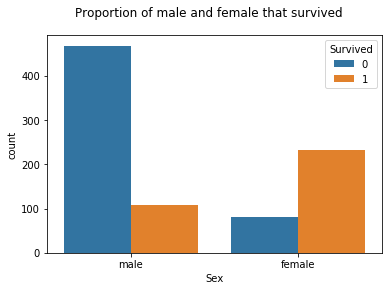

In [14]:
plt.figure()
plt.suptitle('Proportion of male and female that survived')
g = sns.countplot(x="Sex", hue='Survived', data=train_csv);
plt.show()

We can see that if you were a woman on board you had far more luck to stay alive.

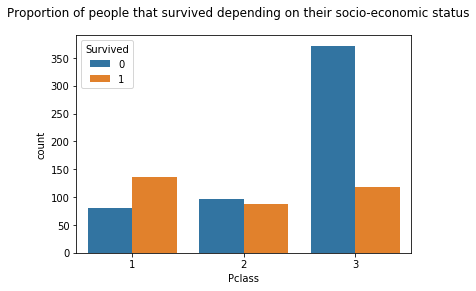

In [15]:
plt.figure()
plt.suptitle('Proportion of people that survived depending on their socio-economic status')
g = sns.countplot(x="Pclass", hue='Survived', data=train_csv);
plt.show()

Again we can see that chances are not equal for everyone. If you are from a 'lower' status you had far more chance to die that if you came from a 'upper' status.

# Model Building

In [10]:
def label_encoding(dataframe, labels):
    """
    Encode categorical variable into numerical values
    """

    le = LabelEncoder()
    for label in labels:
        le.fit(dataframe[label])
        dataframe[label] = le.transform(dataframe[label])

    return dataframe

def normalize_features(X_train):
    """
    Normalize the features by substracting the mean 
    and dividing by the standard deviation
    """

    for features in X_train:
        feats = X_train[features].tolist()
        mean = np.mean(feats)
        std = np.std(feats)
        feats = (feats - mean)/std
        X_train[features] = feats

    return X_train

def get_training_data():
    """
    Clean the data by processing the nan values
    and normalizing the features
    """
    train_csv = pd.read_csv(DATA_DIR + 'train.csv')

    train_csv['Cabin'] = train_csv['Cabin'].fillna('C0')
    train_csv['Embarked'] = train_csv['Embarked'].fillna('0')
    train_csv['Age'] = train_csv['Age'].fillna(train_csv['Age'].mean())
    train_csv = label_encoding(train_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])

    X_train = train_csv[['Pclass', 'Sex', 'Age',  'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
    Y_train = train_csv['Survived']

    normalize_features(X_train)

    return X_train.as_matrix(), Y_train.as_matrix()

def get_testing_data():

    test_csv = pd.read_csv(DATA_DIR + 'test.csv')

    test_csv['Cabin'] = test_csv['Cabin'].fillna('C0')
    test_csv['Embarked'] = test_csv['Embarked'].fillna('0')
    test_csv['Age'] = test_csv['Age'].fillna(test_csv['Age'].mean())
    test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].mean())
    test_csv = label_encoding(test_csv, ['Sex', 'Ticket', 'Cabin', 'Embarked'])

    X_test = test_csv[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

    normalize_features(X_test)

    return X_test.as_matrix(), test_csv['PassengerId']

## Logistic regression training 

In [22]:
X_train, Y_train = get_training_data()

lr = 0.5
J = 0
dw = np.zeros(9)
db = 0
m = X_train.shape[0]

weights = np.random.normal(0, 0.1, 9)
biais = random.normalvariate(0,0.1)

for epoch in range(200):

    for id, (feats, y) in enumerate(zip(X_train, Y_train)):

        z = np.dot(feats,weights) + biais
        a = 1 / (1 + np.exp(-z))
        J = -(y*np.log(a) + (1-a)*np.log(1-a))
        J = np.sum(-(y * np.log(a) + (1 - y) * np.log(1 - a)))
        dz = a - y

        for i, x in enumerate(feats):
            dw[i] = dw[i] + dz*x
            db += dz

    J /= m
    dw /= m
    db /= m

    weights = weights - lr*dw
    biais = biais - lr*db
    
    if epoch % 10 == 0:
        print("epoch %s - loss %s" % (epoch, J))

epoch 0 - loss 0.000774783109831
epoch 10 - loss 0.000210771488417
epoch 20 - loss 0.000162950176312
epoch 30 - loss 0.00014416324677
epoch 40 - loss 0.000134244164515
epoch 50 - loss 0.000128278314993
epoch 60 - loss 0.000124430118377
epoch 70 - loss 0.000121835833892
epoch 80 - loss 0.000120031146537
epoch 90 - loss 0.000118745158055
epoch 100 - loss 0.00011781090468
epoch 110 - loss 0.000117121287244
epoch 120 - loss 0.000116605431397
epoch 130 - loss 0.00011621521743
epoch 140 - loss 0.000115917253269
epoch 150 - loss 0.000115687921474
epoch 160 - loss 0.000115510235068
epoch 170 - loss 0.000115371792983
epoch 180 - loss 0.000115263422143
epoch 190 - loss 0.000115178258179


## Logistic regression prediction 

In [17]:
X_test, PassengerId = get_testing_data()

preds = []
for feats in X_test:

    z = np.dot(feats, weights) + biais
    a = 1 / (1 + np.exp(-z))

    if a > 0.5:
        preds.append(1)
    elif a <= 0.5:
        preds.append(0)
      
sample_ids = np.random.choice(PassengerId, 10)

for id, value in enumerate(sample_ids):
    print('Passenger id : %s - Survived : %s' % (value, preds[id]))
    
gender_submission_csv = pd.read_csv(DATA_DIR + 'gender_submission.csv')

Passenger id : 1245 - Survived : 0
Passenger id : 1034 - Survived : 0
Passenger id : 1085 - Survived : 0
Passenger id : 1308 - Survived : 0
Passenger id : 1038 - Survived : 1
Passenger id : 908 - Survived : 0
Passenger id : 1160 - Survived : 1
Passenger id : 930 - Survived : 0
Passenger id : 1099 - Survived : 1
Passenger id : 1211 - Survived : 0
